In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
sns.set_palette("colorblind")

# Colorblind palette
palette=["#0099CC", # Blue
        "#FFC400",  # Yellow
        "#8B9467",  # Olive
        "#0097A7",  # Teal
        "#FF69B4",  # Pink
        "#666666",  # Gray
        "#CC6600"]  # Brown-Orange

In [3]:
survey_form_path = os.path.join(os.getcwd(), 'datasets/survey.csv')

In [4]:
survey_df = pd.read_csv(survey_form_path)
survey_df.head()

,How often do you clean your keyboard?,How often do you use a public keyboard?,"When you clean your keyboard, how long does it take?",Is it pleasant or demanding to clean and sanitize your keyboard?,"On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?","After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?",What other products have you bought for keyboard cleaning? Answer 'None' if you have never bought keyboard specific cleaning products.,What features would you like to see in an autonomous keyboard cleaner?,"On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?","For cleaning, do you prefer if a human or a robot does it?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?","On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?","On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?","On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?",What visual data would you want present in the admin dashboard?,"After observing the web app and robot integration, do you have any comments or suggestions for the product?"
0,Every month,2-3x a week,Less than 1 minute,"I do not clean it, I would not know",1,2,NaN,Low cost,5,Do not care,3,3,4,5,5,4,5,Nope,Nope
1,Every 3+ months,Almost every day,More than 10 mins,Demanding,4,4,NaN,Cleaning underneath the keys,5,Do not care,3,2,5,5,4,4,4,Support for multiple robots?,UI said keyboard was cleaned before the robot ...
2,Every 3+ months,Almost every day,1-5 mins,Demanding,3,5,"Not cleaning, but a keyboard protector",Easy to use,5,Do not care,5,4,5,5,5,5,4,"Essentially, whether it has been properly clea...",Make sure to let the user know how effective y...
3,Every week,2-3x a week,Less than 1 minute,Demanding,2,2,NaN,high speed. ability to clear up dried grime th...,3,Human should do it,3,4,5,4,5,3,3,I don’t believe I was shown the admin dashboard,no
4,Every week,No more than once a week,1-5 mins,Pleasant,4,5,Keyboard cleaning slime,Cleans properly,4,Do not care,4,4,5,4,5,4,4,Last cleaned date,Robot seems too big to be able to navigate bet...


In [5]:
TOTAL_NUM_RESPONSES = len(survey_df)

In [6]:
survey_df.columns

Index(['How often do you clean your keyboard?',
       'How often do you use a public keyboard?',
       'When you clean your keyboard, how long does it take?',
       'Is it pleasant or demanding to clean and sanitize your keyboard?',
       'On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?',
       'After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?',
       'What other products have you bought for keyboard cleaning? Answer 'None' if you have never bought keyboard specific cleaning products.',
       'What features would you like to see in an autonomous keyboard cleaner?',
       'On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?',
       'For cleaning, do you prefer if a human or a robot does it?',
       'On a scale of 1 to 5 (5 being the 

In [7]:
def autopct_format(pct, all_values):
    absolute = int(round(pct * sum(all_values) / 100.0))  # Convert percentage to count

    if absolute == 0:  # If actual count is 0, return an empty string
        return ""
    
    return f"{absolute}\n({pct:.1f}%)"  # Display count and percentage


In [8]:
custom_stopwords = {"is", "a", "of", "the", "this", "i", "my", "but"}

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in custom_stopwords])


In [9]:
def text_split(text):
    replace_words = ["and", "or", ";", ".", "otherwise"]
    exclude_words = ["i.e", "i.e.", "etc.", "e.g.:"]  # Words to be preserved
    
    pattern = r'\b(?!' + '|'.join(map(re.escape, exclude_words)) + r')\b(?:' + '|'.join(map(re.escape, replace_words)) + r')\b'
    
    text = re.sub(pattern, ',', text)
    
    return text.split(",")

In [10]:
def calculate_mean(x, y):
    return np.round((np.dot(x, y) / TOTAL_NUM_RESPONSES),2)

In [11]:
def calculate_median(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must be of the same length")
    data = np.repeat(x, y)
    return np.median(data)

# Market Research

Q1: How often do you clean your keyboards?  
Options:
- Every day
- Every week
- Every month
- Every 3+ months
- Never

In [12]:
q1_x_bins = ["Every day", "Every week", "Every month", "Every 3+ months", "Never"]

# Options that have not been picked even once, are shown with assigned count 0
q1_y_bins =survey_df["How often do you clean your keyboard?"].value_counts().reindex(q1_x_bins, fill_value=0)

survey_df["How often do you clean your keyboard?"].value_counts()

How often do you clean your keyboard?
Every 3+ months    7
Every month        4
Never              4
Every week         2
Name: count, dtype: int64

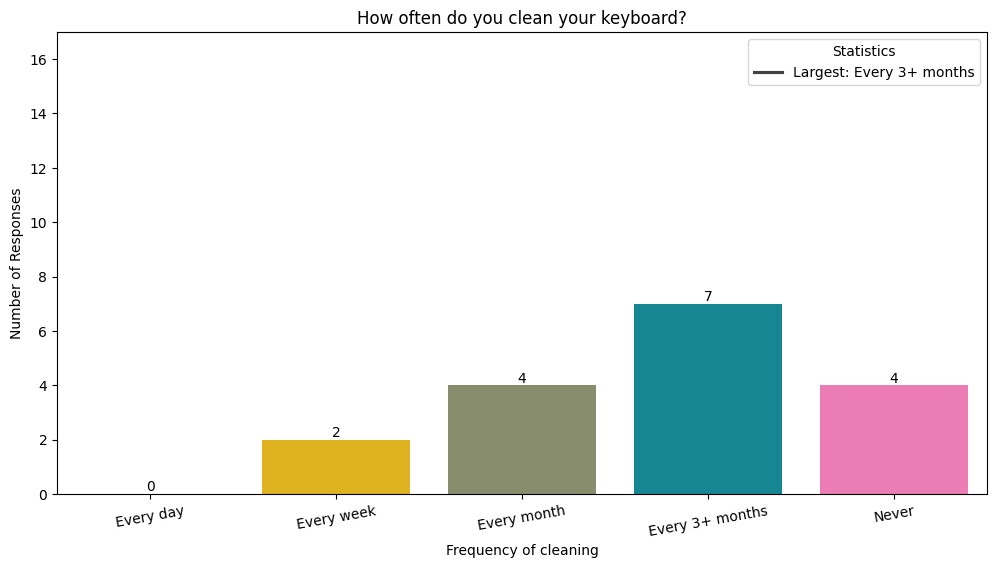

<Figure size 640x480 with 0 Axes>

In [13]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q1_x_bins, y=q1_y_bins, palette=palette)

# Largest Category
largest_category = q1_y_bins.idxmax()

for i, v in enumerate(q1_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Frequency of cleaning")
plt.ylabel("Number of Responses")
plt.title("How often do you clean your keyboard?")
plt.show()
plt.tight_layout()

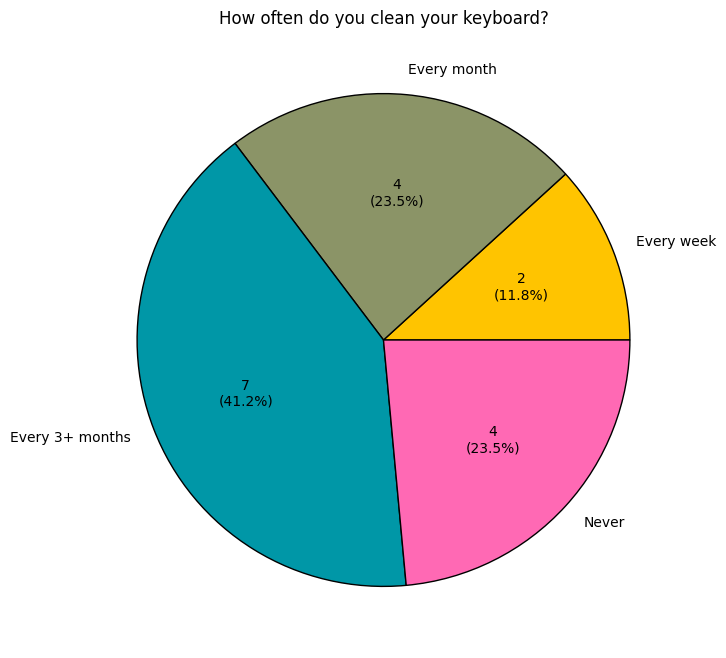

In [14]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q1_x_bins, q1_y_bins)]

plt.pie(q1_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q1_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('How often do you clean your keyboard?')
plt.show()

Q2 How often do you use a public keyboard?  
Options:
- Almost every day
- 2-3x a week
- No more than once a week
- Once every 2 weeks
- Rarely
- Never

In [15]:
q2_x_bins = ["Almost every day", "2-3x a week", "No more than once a week", "Once every 2 weeks", "Rarely", "Never"]

# Options that have not been picked even once, are shown with assigned count 0
q2_y_bins =survey_df["How often do you use a public keyboard?"].value_counts().reindex(q2_x_bins, fill_value=0)

survey_df["How often do you use a public keyboard?"].value_counts()

How often do you use a public keyboard?
Almost every day            7
Rarely                      6
2-3x a week                 3
No more than once a week    1
Name: count, dtype: int64

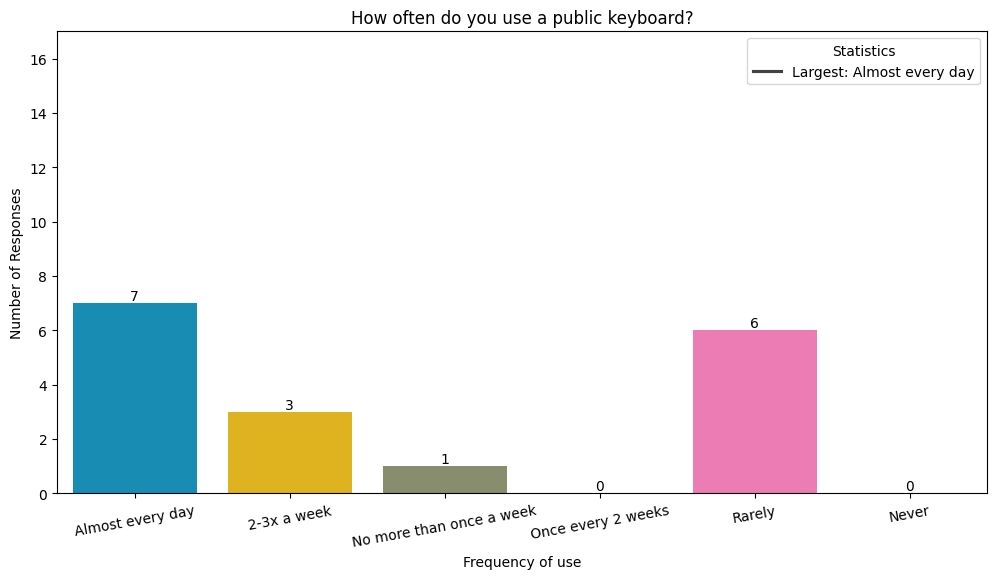

<Figure size 640x480 with 0 Axes>

In [16]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q2_x_bins, y=q2_y_bins, palette=palette)

# Largest Category
largest_category = q2_y_bins.idxmax()

for i, v in enumerate(q2_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Frequency of use")
plt.ylabel("Number of Responses")
plt.title("How often do you use a public keyboard?")
plt.show()
plt.tight_layout()

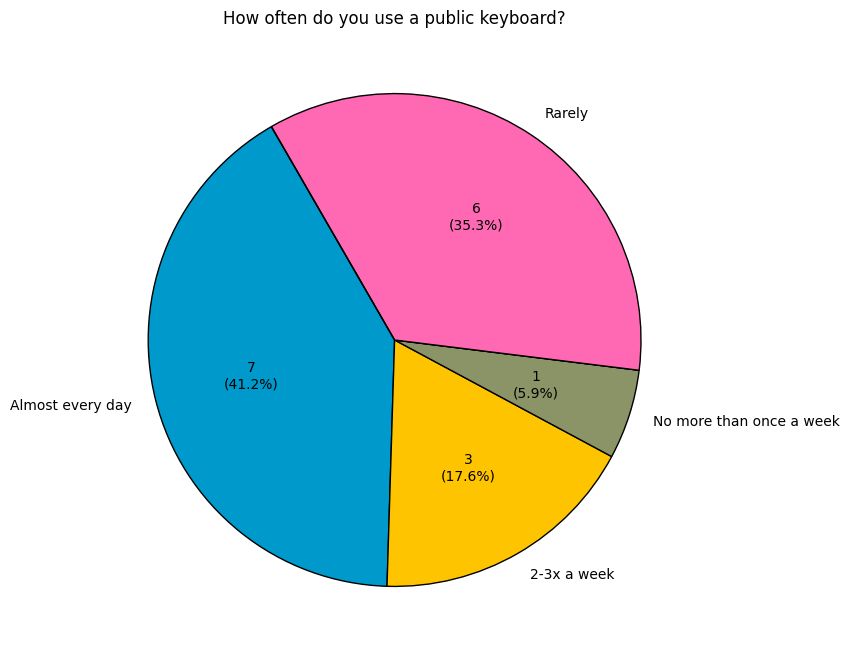

In [17]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q2_x_bins, q2_y_bins)]

plt.pie(q2_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q2_y_bins), 
        colors=palette, startangle=120, wedgeprops={'edgecolor': 'black'})
plt.title('How often do you use a public keyboard?')
plt.show()

Q3. When you clean your keyboard, how long does it take?  
Options: 
- Less than 1 minute
- 1-5 mins
- 5-10 mins
- More than 10 mins
- I do not clean it, I do not know

In [18]:
q3_x_bins = ["Less than 1 minute", "1-5 mins", "5-10 mins", "More than 10 mins", "I do not clean it, I do not know"]

# Options that have not been picked even once, are shown with assigned count 0
q3_y_bins =survey_df["When you clean your keyboard, how long does it take?"].value_counts().reindex(q3_x_bins, fill_value=0)

survey_df["When you clean your keyboard, how long does it take?"].value_counts()

When you clean your keyboard, how long does it take?
1-5 mins                            5
I do not clean it, I do not know    4
Less than 1 minute                  3
More than 10 mins                   3
5-10 mins                           2
Name: count, dtype: int64

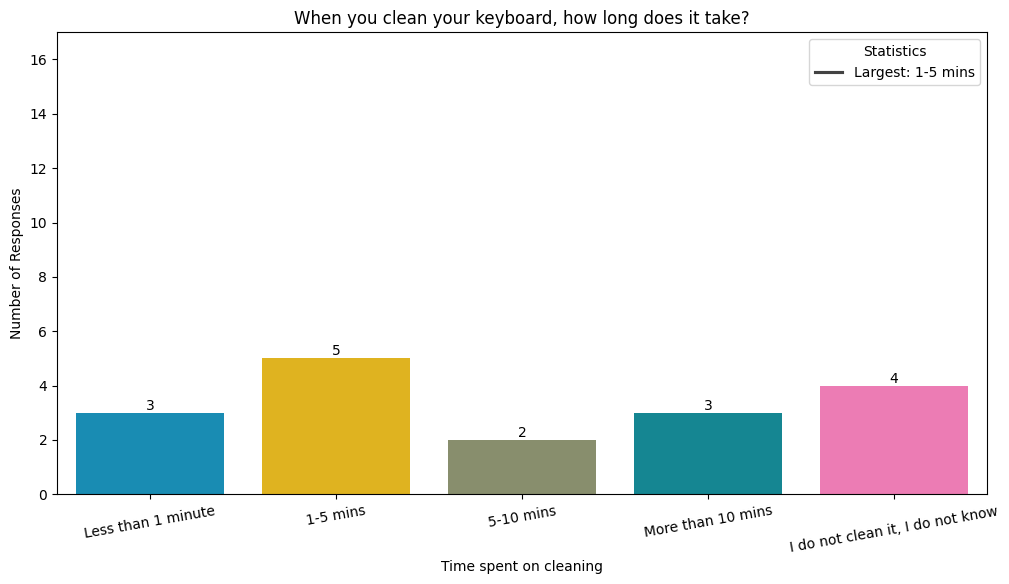

<Figure size 640x480 with 0 Axes>

In [19]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q3_x_bins, y=q3_y_bins, palette=palette)

# Largest Category
largest_category = q3_y_bins.idxmax()

for i, v in enumerate(q3_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Time spent on cleaning")
plt.ylabel("Number of Responses")
plt.title("When you clean your keyboard, how long does it take?")
plt.show()
plt.tight_layout()

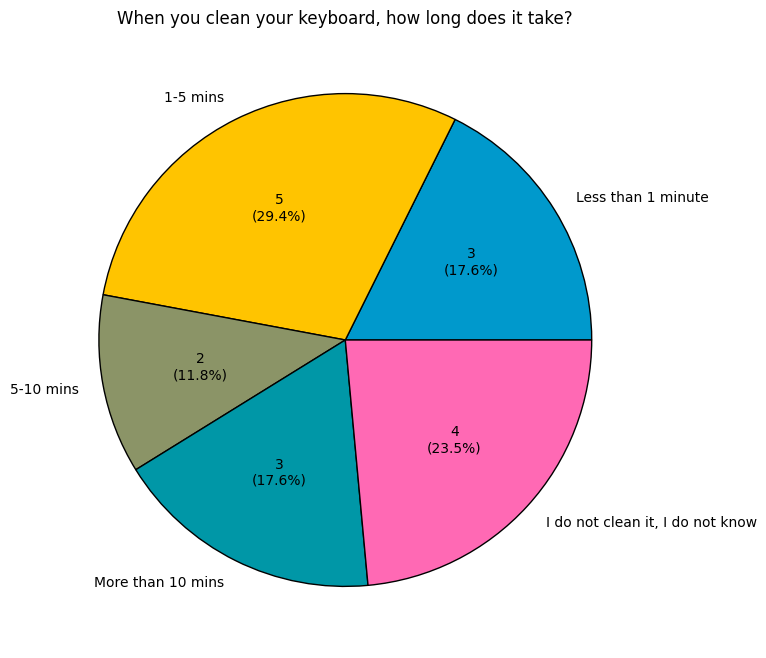

In [20]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q3_x_bins, q3_y_bins)]

plt.pie(q3_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q3_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('When you clean your keyboard, how long does it take?')
plt.show()

Q4. Is it pleasant or demanding to clean and sanitize your keyboard?  
Options: 
- Pleasant
- Demanding
- I do not clean it, I would not know

In [21]:
q4_x_bins = ["Pleasant", "Demanding", "I do not clean it, I would not know"]

# Options that have not been picked even once, are shown with assigned count 0
q4_y_bins =survey_df["Is it pleasant or demanding to clean and sanitize your keyboard?"].value_counts().reindex(q4_x_bins, fill_value=0)

survey_df["Is it pleasant or demanding to clean and sanitize your keyboard?"].value_counts()

Is it pleasant or demanding to clean and sanitize your keyboard?
Demanding                              13
I do not clean it, I would not know     2
Pleasant                                2
Name: count, dtype: int64

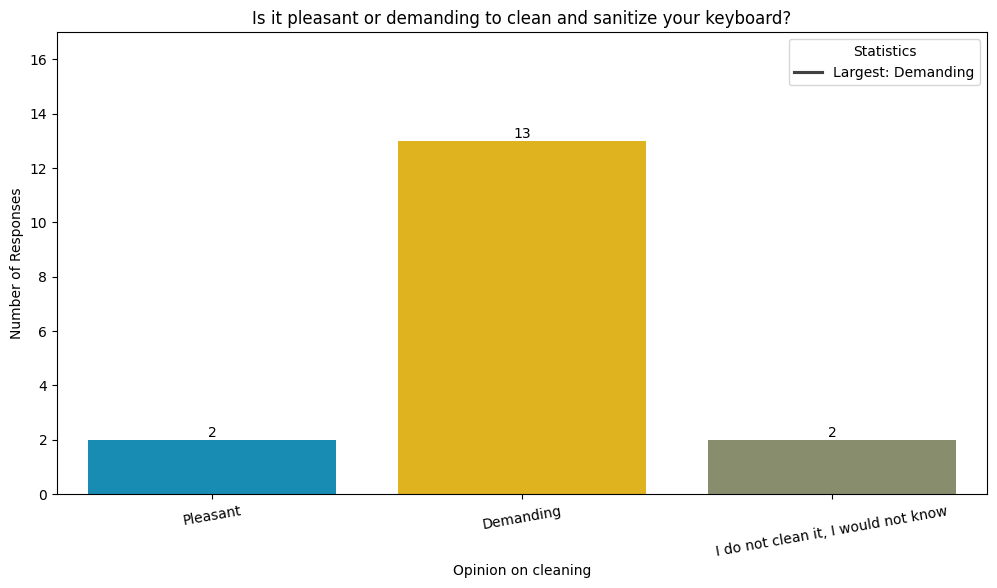

<Figure size 640x480 with 0 Axes>

In [22]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q4_x_bins, y=q4_y_bins, palette=palette)

# Largest Category
largest_category = q4_y_bins.idxmax()

for i, v in enumerate(q4_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Opinion on cleaning")
plt.ylabel("Number of Responses")
plt.title("Is it pleasant or demanding to clean and sanitize your keyboard?")
plt.show()
plt.tight_layout()

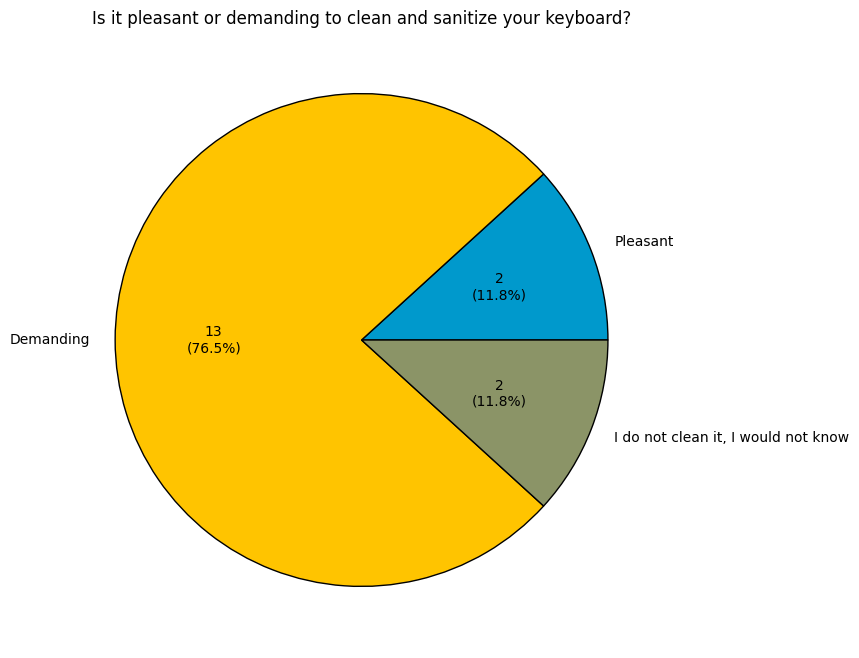

In [23]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q4_x_bins, q4_y_bins)]

plt.pie(q4_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q4_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('Is it pleasant or demanding to clean and sanitize your keyboard?')
plt.show()

Q5. On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?

In [24]:
q5_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q5_y_bins = survey_df["On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?"].value_counts().reindex(q5_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?"].value_counts()

On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?
3    7
2    3
4    3
5    3
1    1
Name: count, dtype: int64

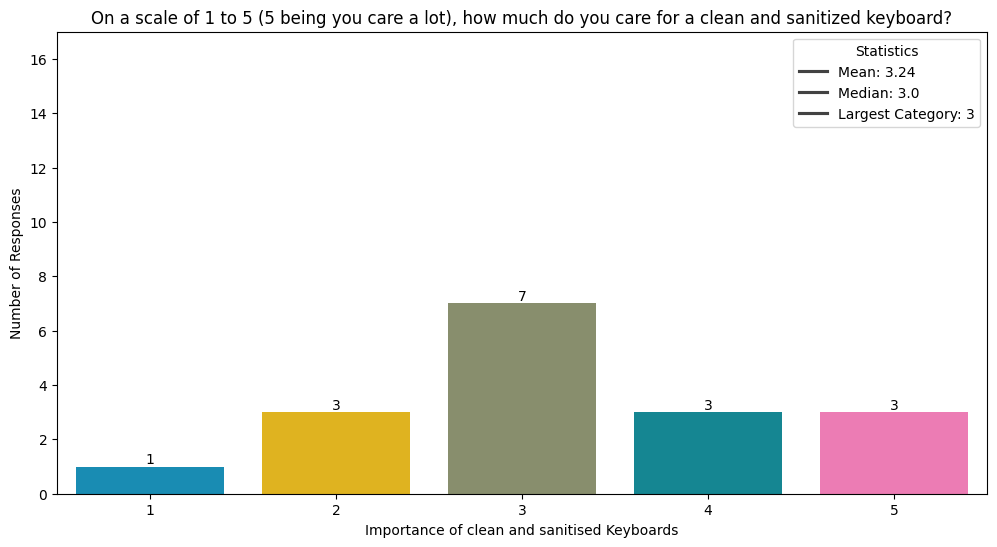

<Figure size 640x480 with 0 Axes>

In [25]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q5_x_bins, y=q5_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q5_x_bins, q5_y_bins)

# Median Value
median_value = calculate_median(q5_x_bins, q5_y_bins)

# Largest Category
largest_category = q5_y_bins.idxmax()

for i, v in enumerate(q5_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?")
plt.show()
plt.tight_layout()

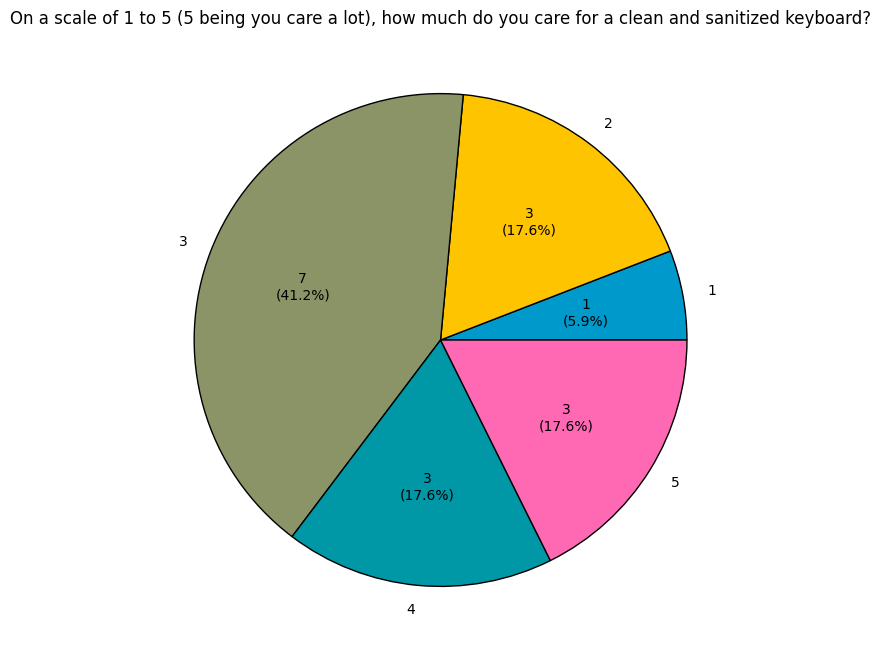

In [26]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q5_x_bins, q5_y_bins)]

plt.pie(q5_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q5_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?')
plt.show()

Q6. After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?

In [27]:
q6_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q6_y_bins = survey_df["After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?"].value_counts().reindex(q6_x_bins, fill_value=0)

survey_df["After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?"].value_counts()

After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?
4    7
5    7
2    2
3    1
Name: count, dtype: int64

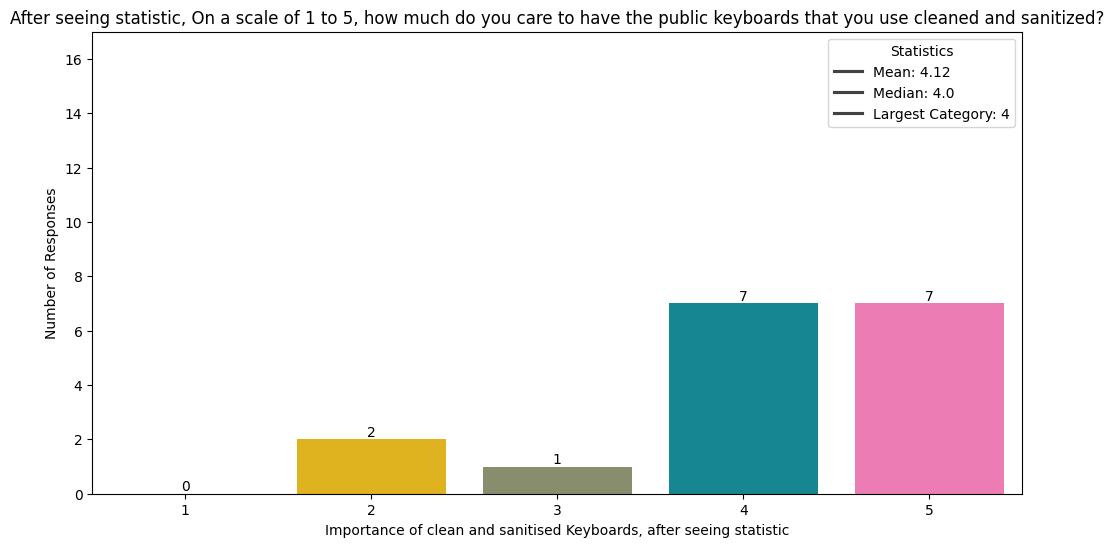

<Figure size 640x480 with 0 Axes>

In [28]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q6_x_bins, y=q6_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q6_x_bins, q6_y_bins)

# Median Value
median_value = calculate_median(q6_x_bins, q6_y_bins)


# Largest Category
largest_category = q6_y_bins.idxmax()

for i, v in enumerate(q6_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards, after seeing statistic")
plt.ylabel("Number of Responses")
plt.title("After seeing statistic, On a scale of 1 to 5, how much do you care to have the public keyboards that you use cleaned and sanitized?")
plt.show()
plt.tight_layout()

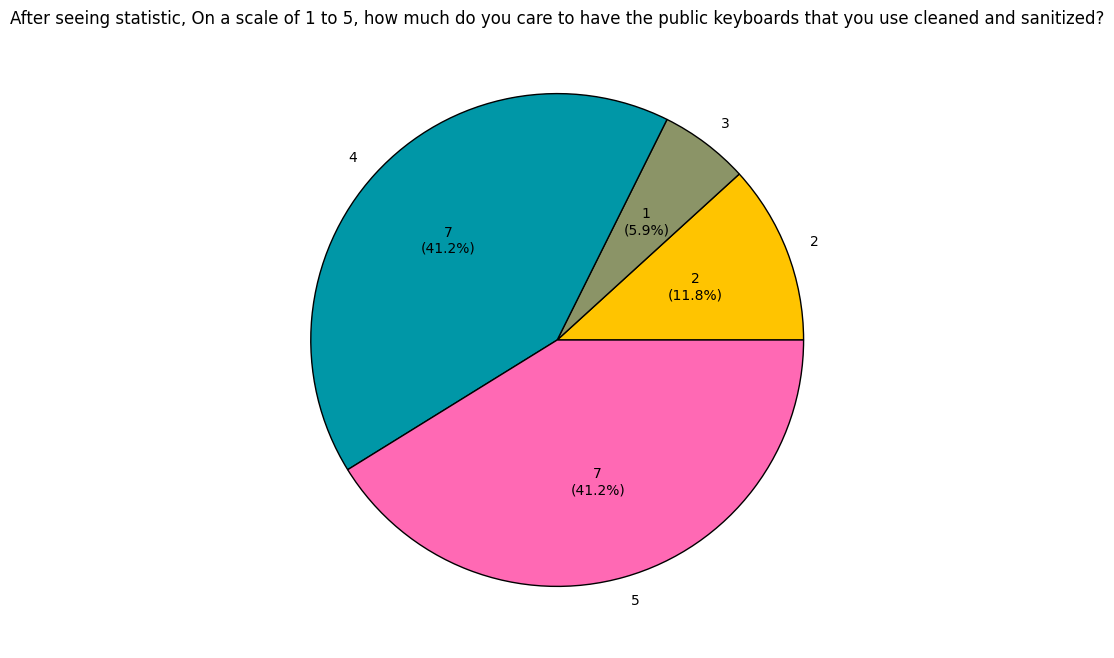

In [29]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q6_x_bins, q6_y_bins)]

plt.pie(q6_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q6_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('After seeing statistic, On a scale of 1 to 5, how much do you care to have the public keyboards that you use cleaned and sanitized?')
plt.show()

Q7. What other products have you bought for keyboard cleaning? Answer 'None' if you have never bought keyboard specific cleaning products.

In [30]:
q7_text_map = {
                "slime" : "slime",
                "protector" : "keyboard protector",
                "air" : "air spray can",
                "paper" : "paper towel",
                "wipes" : "wipes",
                "alcohol" : "alcohol",
                "sanitizer" : "sanitiser",
                "brushes" : "brushes",
                "not cleaning" : "not cleaning",
                "none" : "not cleaning"
}

def q7_map_text(text):
    keys = list(q7_text_map.keys())
    
    for key in keys:
        if key in text:
            return q7_text_map[key]
    
    return text

In [31]:
survey_df["q7_text"] = survey_df["What other products have you bought for keyboard cleaning? Answer \'None\' if you have never bought keyboard specific cleaning products."].dropna().astype(str).apply(str.lower).apply(lambda x: remove_stopwords(x))
q7_text = list(survey_df["q7_text"].dropna())

print(q7_text)

cleaned_q7_text = []
for text in q7_text:
    cleaned_text = text_split(text)
    for word in cleaned_text:
        cleaned_q7_text.append(q7_map_text(word.strip()))

print(cleaned_q7_text)

['not cleaning, keyboard protector', 'keyboard cleaning slime', 'none', 'slime product to get crumbs/dust in cracks', 'air duster, paper towels, alcohol', 'pressurized air, wipes', 'bring own keyboard to public computers', 'air spray cans and brushes']
['not cleaning', 'keyboard protector', 'slime', 'not cleaning', 'slime', 'air spray can', 'paper towel', 'alcohol', 'air spray can', 'wipes', 'bring own keyboard to public computers', 'air spray can', 'brushes']


not_cleaning keyboard_protector slime not_cleaning slime air_spray_can paper_towel alcohol air_spray_can wipes bring_own_keyboard_to_public_computers air_spray_can brushes


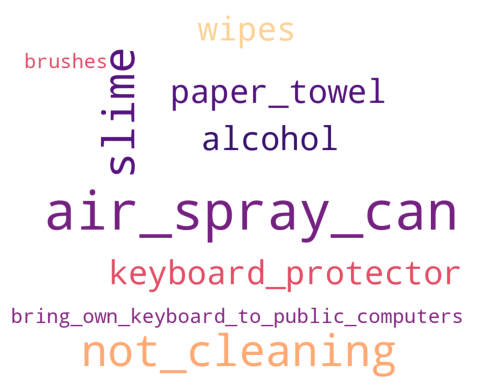

<Figure size 640x480 with 0 Axes>

In [32]:
processed_text = " ".join(token.replace(" ", "_") for token in cleaned_q7_text)
print(processed_text)

wordcloud_q7 = WordCloud(width=1000, 
                        height=800, 
                        background_color="white",
                        colormap="magma").generate(processed_text)
plt.imshow(wordcloud_q7)
plt.axis("off")
plt.show()
plt.tight_layout()

Q8. What features would you like to see in an autonomous keyboard cleaner?

In [33]:
q8_text_map = {
                "low cost" : "low cost",
                "cleaning underneath the keys" : "cleaning underneath the keys",
                "easy to use" : "easy to use",
                "high speed" : "high movement speed",
                "clear up dried grime" : "deep cleaning",
                "properly" : "deep cleaning",
                "ease of use" : "easy to use",
                "don’t have to think" : "don't have to think",
                "unsure" : "unsure",
                "between keys" : "cleaning underneath the keys",
                "vacuuming" : "vacuuming",
                "wiping" : "wiping",
                "well" : "deep cleaning",
                "fast" : "fast",
                "thorough" : "deep cleaning",
                "too big" : "small",
                "hoovering" : "vacuuming",
                "speed" : "high movement speed",
                "dirt" : "deep cleaning",
                "dry" : "afterwards dry",
                "too long" : "fast",
                "stickiness" : "deep cleaning",
                "quick" : "fast",
                "simple" : "easy to use",
}

def q8_map_text(text):
    keys = list(q8_text_map.keys())
    
    for key in keys:
        if key in text:
            return q8_text_map[key]
    
    return text

In [34]:
survey_df["q8_text"] = survey_df["What features would you like to see in an autonomous keyboard cleaner?"].dropna().astype(str).apply(str.lower)
q8_text = list(survey_df["q8_text"].dropna())

print(q8_text)

cleaned_q8_text = []
for text in q8_text:
    cleaned_text = text_split(text)
    for word in cleaned_text:
        cleaned_q8_text.append(q8_map_text(word.strip()))

print(cleaned_q8_text)

['low cost', 'cleaning underneath the keys', 'easy to use', 'high speed. ability to clear up dried grime that can’t just be wiped off', 'cleans properly ', 'ease of use, something i don’t have to think about very much ', 'unsure ', 'would be great if it can clean mechanical keyboards too (including between keys)', 'potentially some vacuuming or wiping for other cleaning apart from germs', 'cleans well', 'the cleaning bot should clean fast, clean thoroughly, the bot shouldn’t be too big ', 'hoovering up crumbs and dirt', 'speed', 'self charging ', 'ensure once it’s done it’s dry,  doesn’t take too  too long, something to remove stickiness?', 'being quick, simple to use and efficient ']
['low cost', 'cleaning underneath the keys', 'easy to use', 'high movement speed', 'deep cleaning', 'easy to use', "don't have to think", 'unsure', 'cleaning underneath the keys', 'vacuuming', 'wiping', 'deep cleaning', 'fast', 'deep cleaning', 'small', 'vacuuming', 'deep cleaning', 'high movement speed',

low_cost cleaning_underneath_the_keys easy_to_use high_movement_speed deep_cleaning easy_to_use don't_have_to_think unsure cleaning_underneath_the_keys vacuuming wiping deep_cleaning fast deep_cleaning small vacuuming deep_cleaning high_movement_speed self_charging afterwards_dry fast deep_cleaning fast easy_to_use efficient


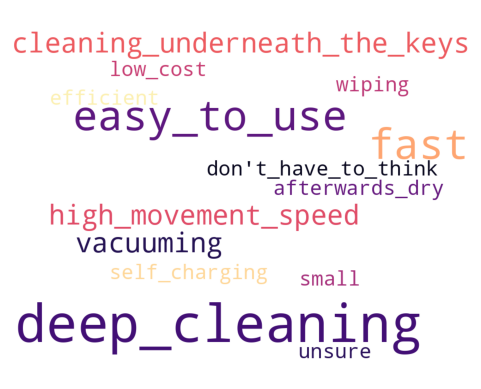

<Figure size 640x480 with 0 Axes>

In [35]:
processed_text = " ".join(token.replace(" ", "_") for token in cleaned_q8_text)
print(processed_text)

wordcloud_q8 = WordCloud(width=1000, 
                        height=800, 
                        background_color="white",
                        colormap="magma").generate(processed_text)
plt.imshow(wordcloud_q8)
plt.axis("off")
plt.show()
plt.tight_layout()

Q9. On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?

In [36]:
q9_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q9_y_bins = survey_df["On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?"].value_counts().reindex(q9_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?"].value_counts()

On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?
5    11
4     3
3     2
2     1
Name: count, dtype: int64

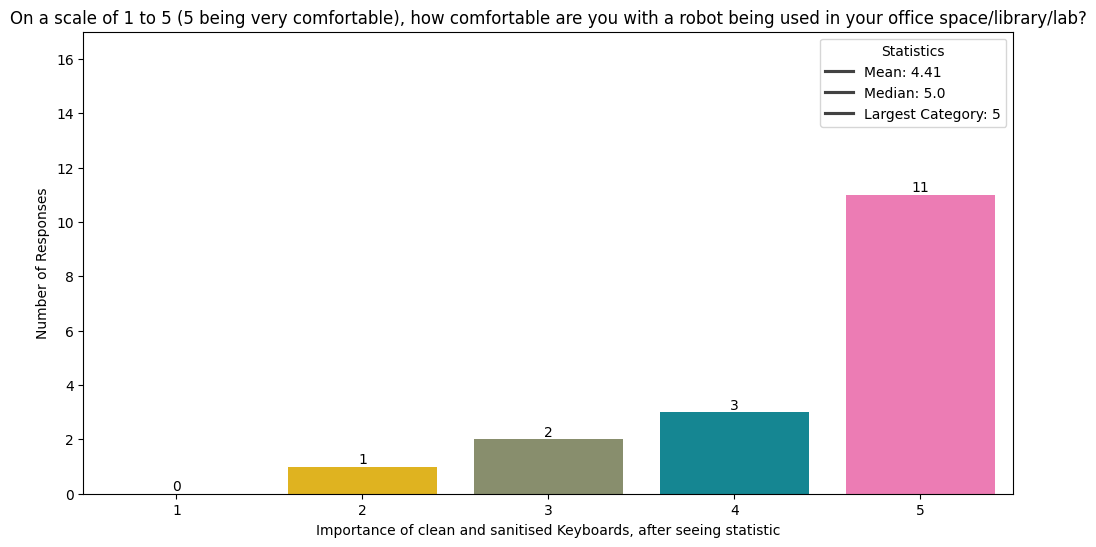

<Figure size 640x480 with 0 Axes>

In [37]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q9_x_bins, y=q9_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q9_x_bins, q9_y_bins)

# Median Value
median_value = calculate_median(q9_x_bins, q9_y_bins)


# Largest Category
largest_category = q9_y_bins.idxmax()

for i, v in enumerate(q9_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards, after seeing statistic")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?")
plt.show()
plt.tight_layout()

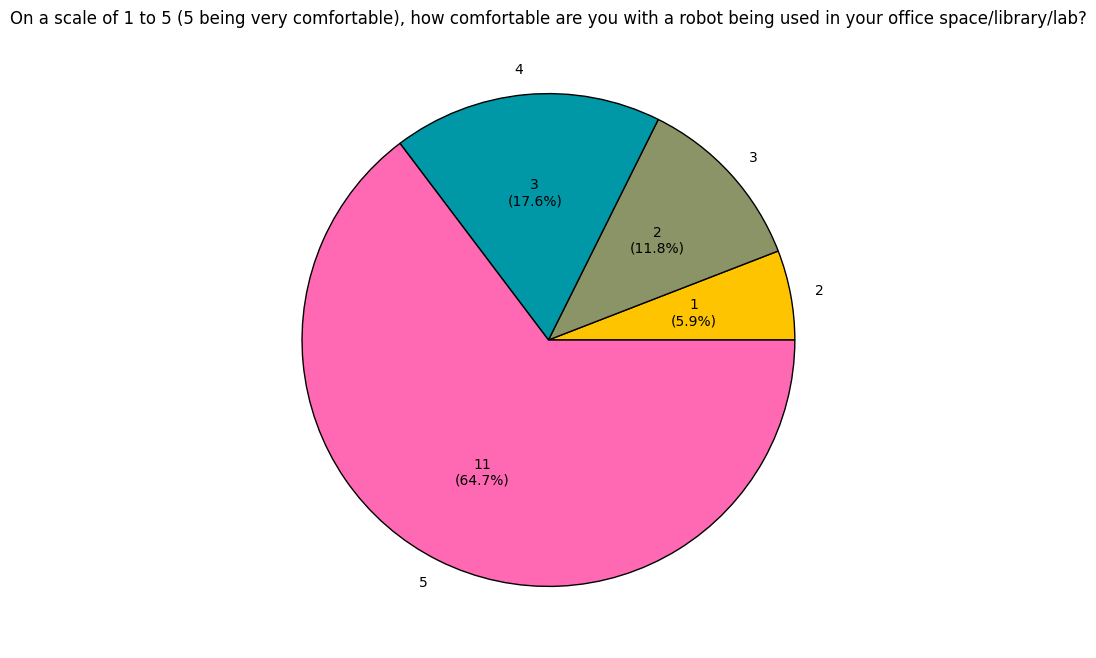

In [38]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q9_x_bins, q9_y_bins)]

plt.pie(q9_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q9_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?')
plt.show()


Q10. For cleaning, do you prefer if a human or a robot does it?

In [39]:
q10_x_bins = ["Human should do it", "Robot should do it", "Do not care"]

# Options that have not been picked even once, are shown with assigned count 0
q10_y_bins = survey_df["For cleaning, do you prefer if a human or a robot does it?"].value_counts().reindex(q10_x_bins, fill_value=0)

survey_df["For cleaning, do you prefer if a human or a robot does it?"].value_counts()

For cleaning, do you prefer if a human or a robot does it?
Do not care           13
Human should do it     2
Robot should do it     2
Name: count, dtype: int64

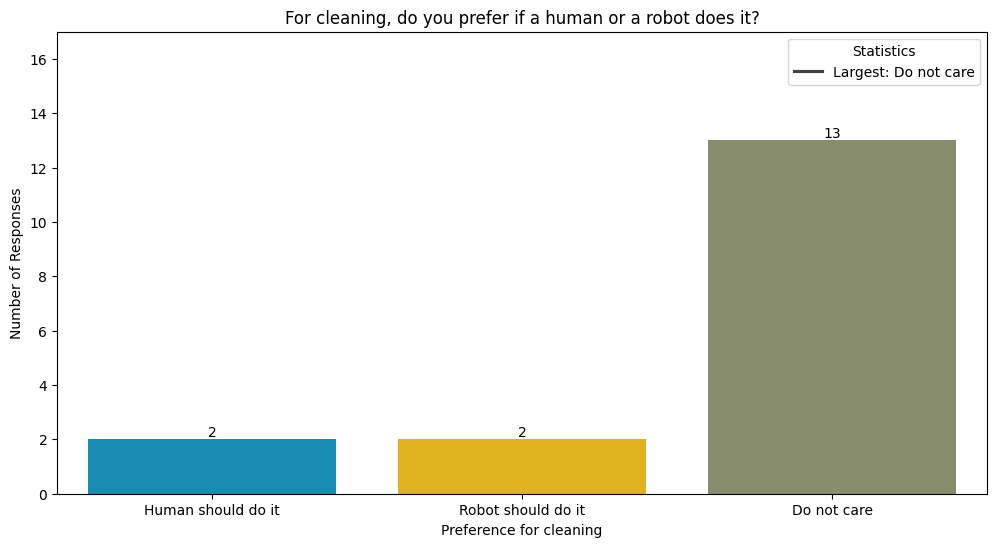

<Figure size 640x480 with 0 Axes>

In [40]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q10_x_bins, y=q10_y_bins, palette=palette)

# Largest Category
largest_category = q10_y_bins.idxmax()

for i, v in enumerate(q10_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Preference for cleaning")
plt.ylabel("Number of Responses")
plt.title("For cleaning, do you prefer if a human or a robot does it?")
plt.show()
plt.tight_layout()

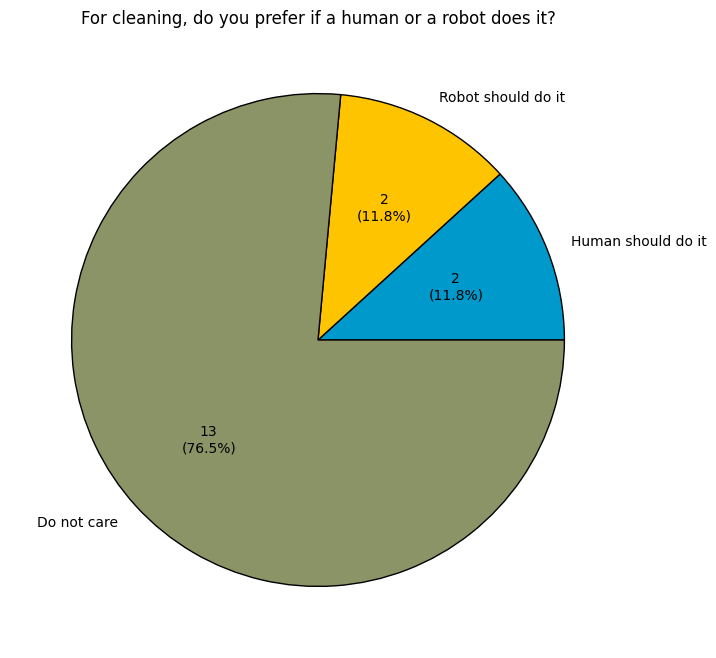

In [41]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q10_x_bins, q10_y_bins)]

plt.pie(q10_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q10_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('For cleaning, do you prefer if a human or a robot does it?')
plt.show()


# Product Research

Q11. On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?

In [42]:
q11_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q11_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?"].value_counts().reindex(q11_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?
3    8
4    6
5    2
2    1
Name: count, dtype: int64

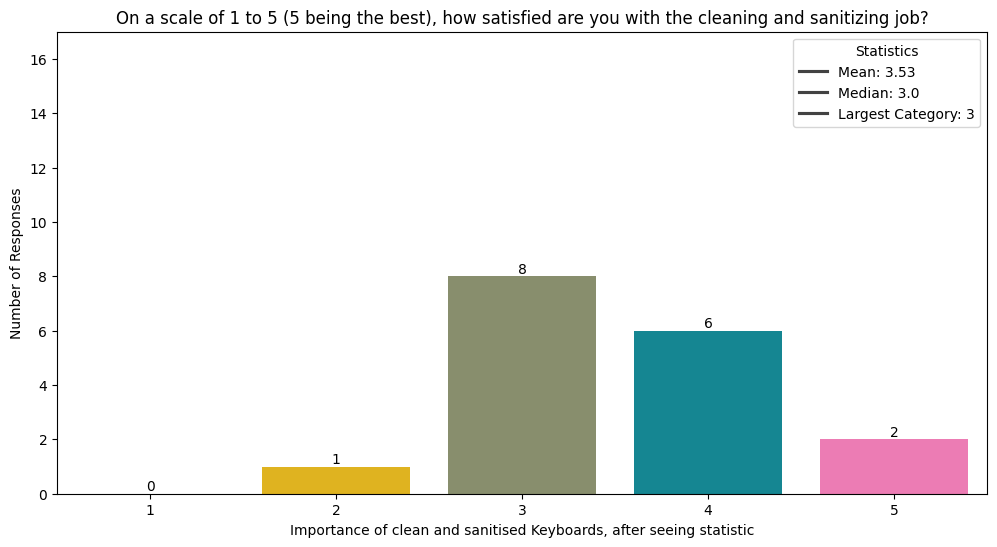

<Figure size 640x480 with 0 Axes>

In [43]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q11_x_bins, y=q11_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q11_x_bins, q11_y_bins)

# Median Value
median_value = calculate_median(q11_x_bins, q11_y_bins)


# Largest Category
largest_category = q11_y_bins.idxmax()

for i, v in enumerate(q11_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards, after seeing statistic")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?")
plt.show()
plt.tight_layout()

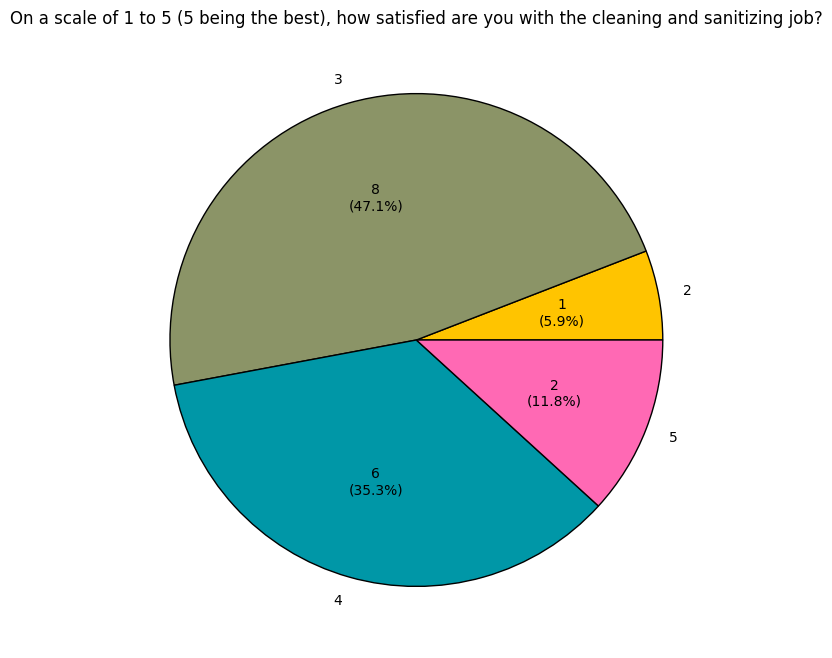

In [44]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q11_x_bins, q11_y_bins)]

plt.pie(q11_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q11_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?')
plt.show()


Q12. On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?

In [45]:
q12_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q12_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?"].value_counts().reindex(q12_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?
4    7
3    4
2    4
5    2
Name: count, dtype: int64

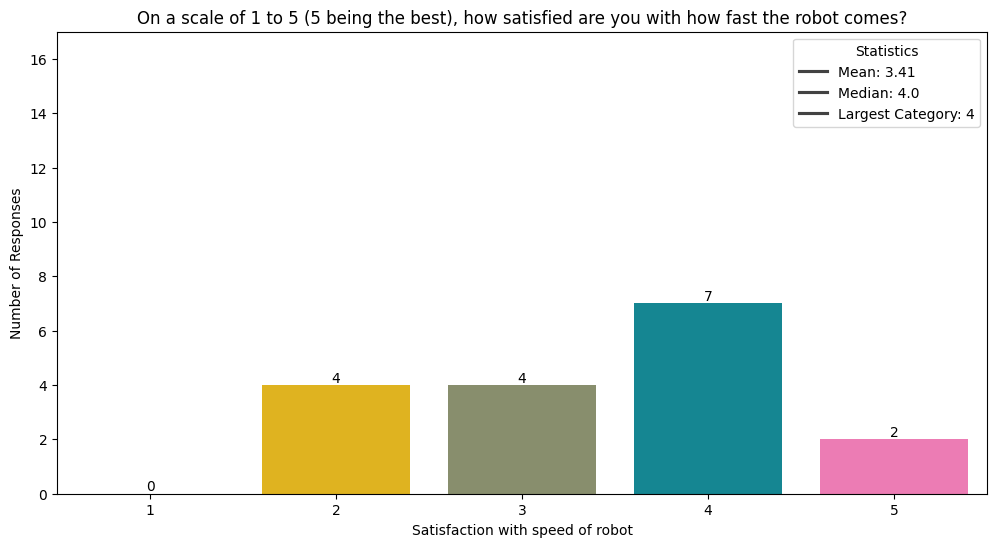

<Figure size 640x480 with 0 Axes>

In [69]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q12_x_bins, y=q12_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q12_x_bins, q12_y_bins)

# Median Value
median_value = calculate_median(q12_x_bins, q12_y_bins)


# Largest Category
largest_category = q12_y_bins.idxmax()

for i, v in enumerate(q12_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with speed of robot")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?")
plt.show()
plt.tight_layout()

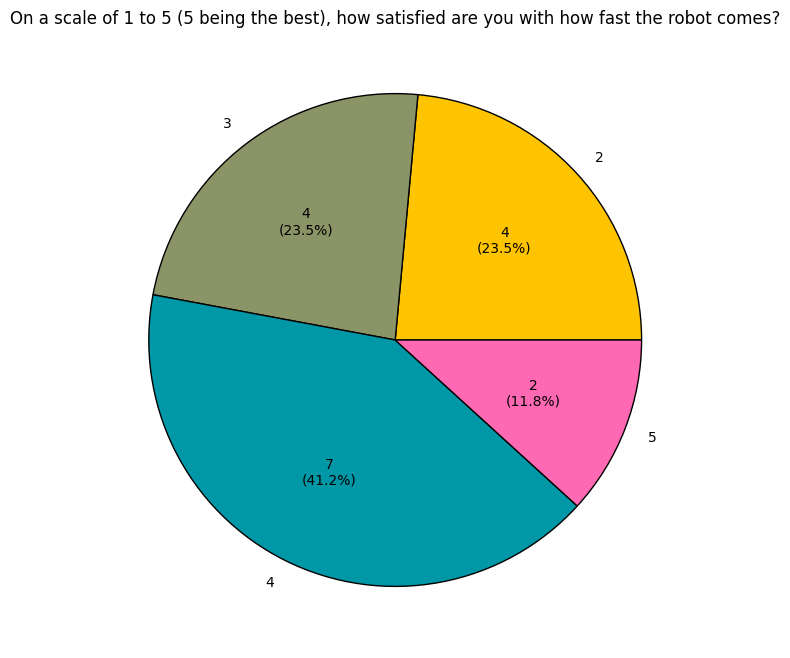

In [47]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q12_x_bins, q12_y_bins)]

plt.pie(q12_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q12_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?')
plt.show()


Q13. On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?

In [48]:
q13_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q13_y_bins = survey_df["On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?"].value_counts().reindex(q13_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?"].value_counts()

On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?
5    13
4     4
Name: count, dtype: int64

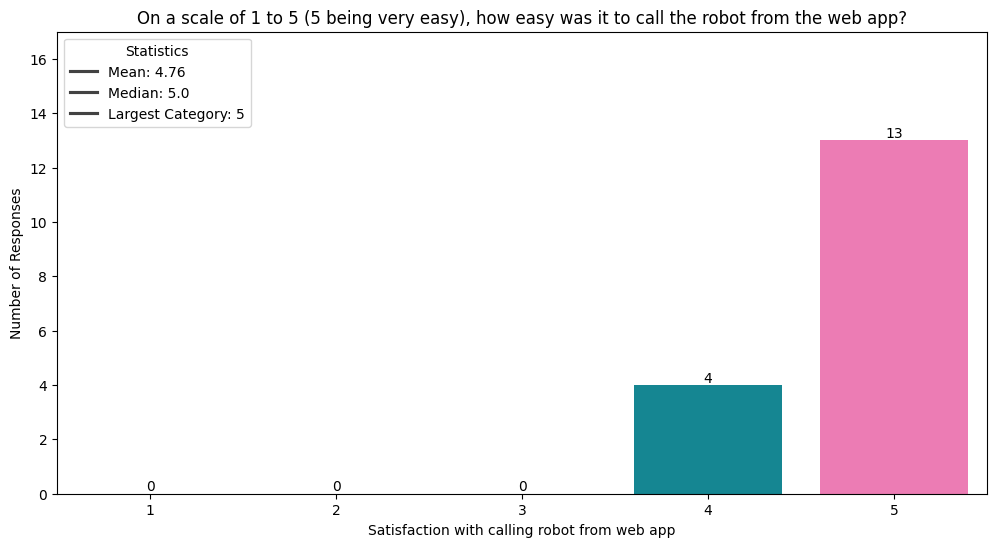

<Figure size 640x480 with 0 Axes>

In [49]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q13_x_bins, y=q13_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q13_x_bins, q13_y_bins)

# Median Value
median_value = calculate_median(q13_x_bins, q13_y_bins)


# Largest Category
largest_category = q13_y_bins.idxmax()

for i, v in enumerate(q13_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with calling robot from web app")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?")
plt.show()
plt.tight_layout()

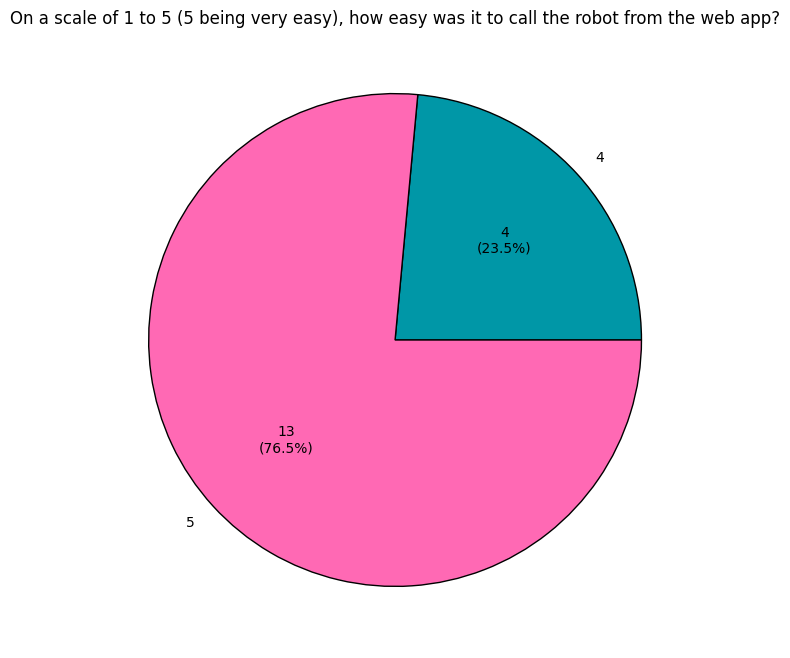

In [50]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q13_x_bins, q13_y_bins)]

plt.pie(q13_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q13_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?')
plt.show()


Q14. On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?

In [51]:
q14_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q14_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?"].value_counts().reindex(q14_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?
4    9
5    7
3    1
Name: count, dtype: int64

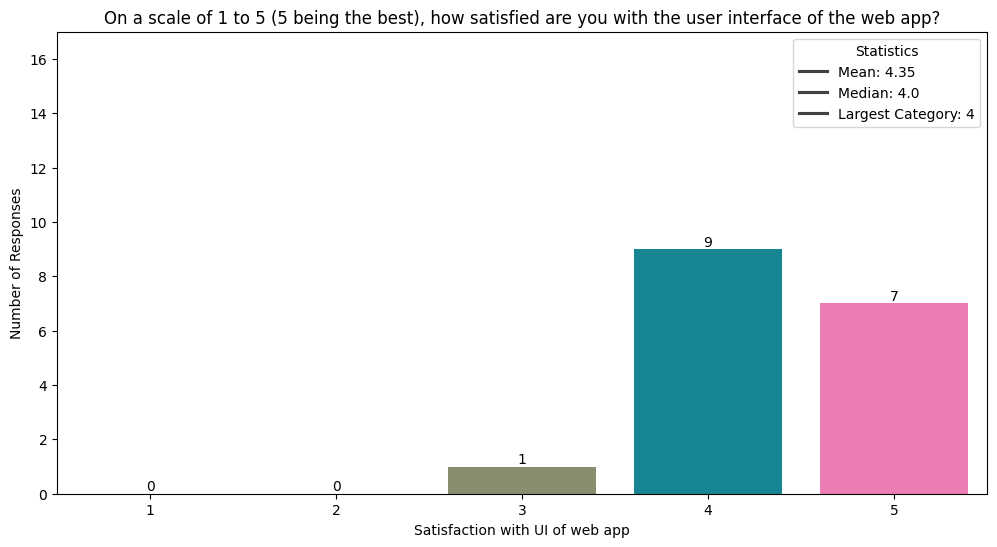

<Figure size 640x480 with 0 Axes>

In [52]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q14_x_bins, y=q14_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q14_x_bins, q14_y_bins)

# Median Value
median_value = calculate_median(q14_x_bins, q14_y_bins)


# Largest Category
largest_category = q14_y_bins.idxmax()

for i, v in enumerate(q14_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with UI of web app")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?")
plt.show()
plt.tight_layout()

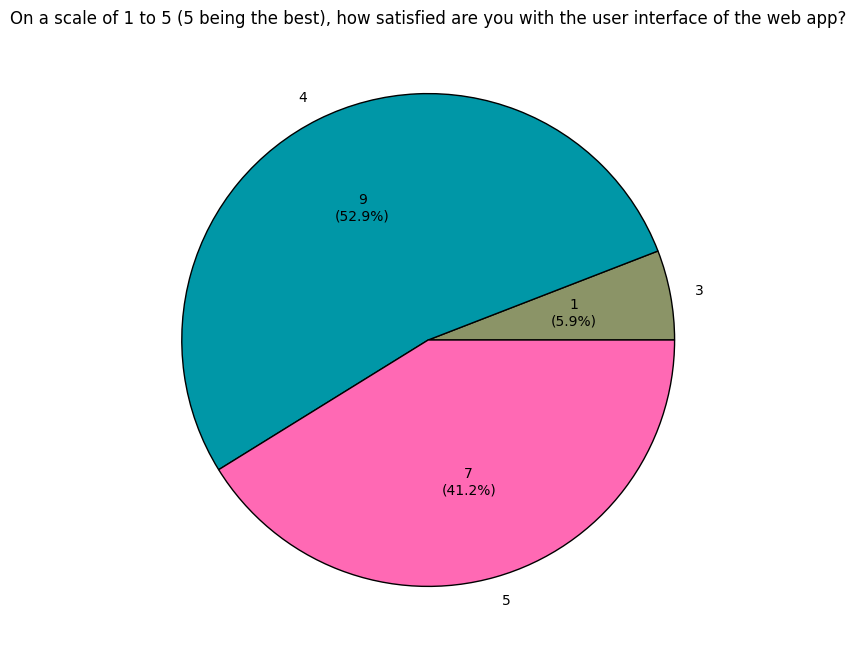

In [53]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q14_x_bins, q14_y_bins)]

plt.pie(q14_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q14_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?')
plt.show()


Q15. On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?

In [54]:
q15_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q15_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?"].value_counts().reindex(q15_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?
5    12
4     3
3     2
Name: count, dtype: int64

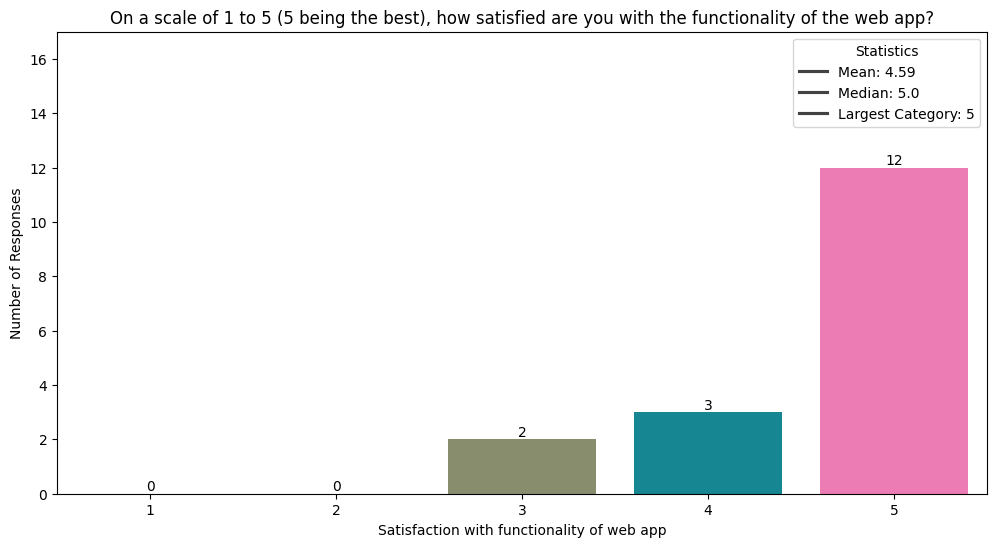

<Figure size 640x480 with 0 Axes>

In [55]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q15_x_bins, y=q15_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q15_x_bins, q15_y_bins)

# Median Value
median_value = calculate_median(q15_x_bins, q15_y_bins)


# Largest Category
largest_category = q15_y_bins.idxmax()

for i, v in enumerate(q15_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with functionality of web app")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?")
plt.show()
plt.tight_layout()

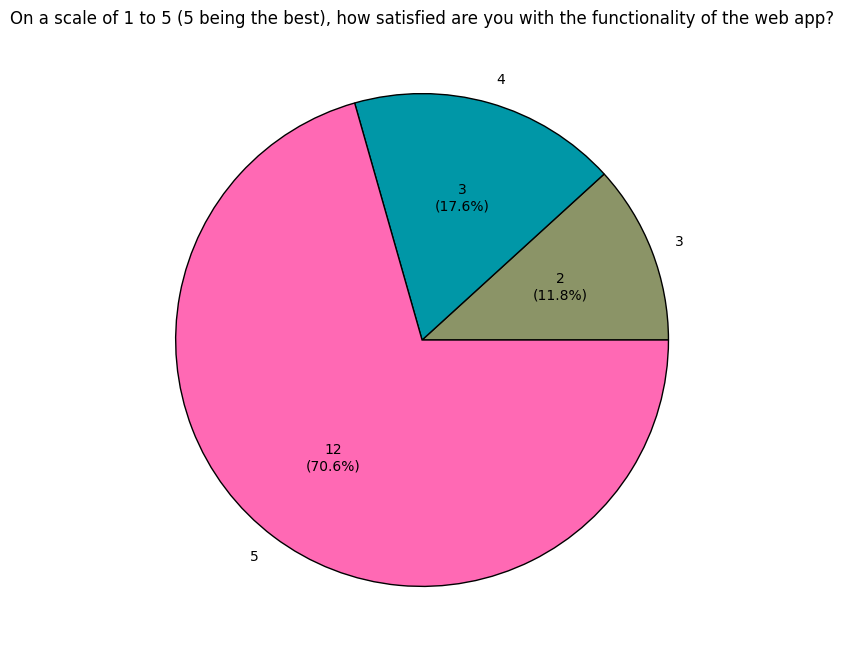

In [56]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q15_x_bins, q15_y_bins)]

plt.pie(q15_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q15_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?')
plt.show()


Q16. On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?

In [57]:
q16_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q16_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?"].value_counts().reindex(q16_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?
4    9
5    5
3    3
Name: count, dtype: int64

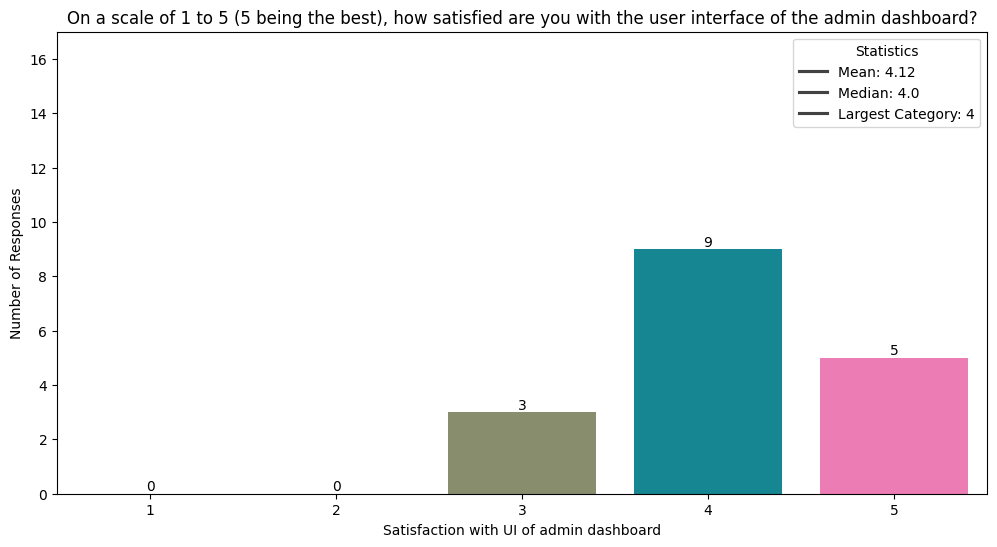

<Figure size 640x480 with 0 Axes>

In [58]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q16_x_bins, y=q16_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q16_x_bins, q16_y_bins)

# Median Value
median_value = calculate_median(q16_x_bins, q16_y_bins)


# Largest Category
largest_category = q16_y_bins.idxmax()

for i, v in enumerate(q16_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with UI of admin dashboard")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?")
plt.show()
plt.tight_layout()

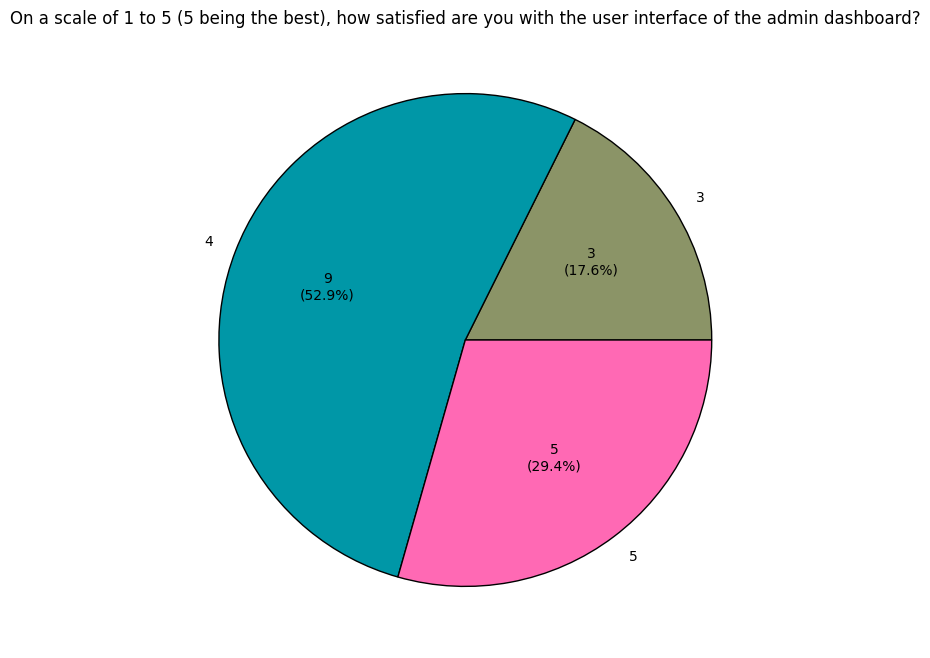

In [59]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q16_x_bins, q16_y_bins)]

plt.pie(q16_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q16_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?')
plt.show()


Q17. On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?

In [60]:
q17_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q17_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?"].value_counts().reindex(q17_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?"].value_counts()

On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?
4    8
5    6
3    3
Name: count, dtype: int64

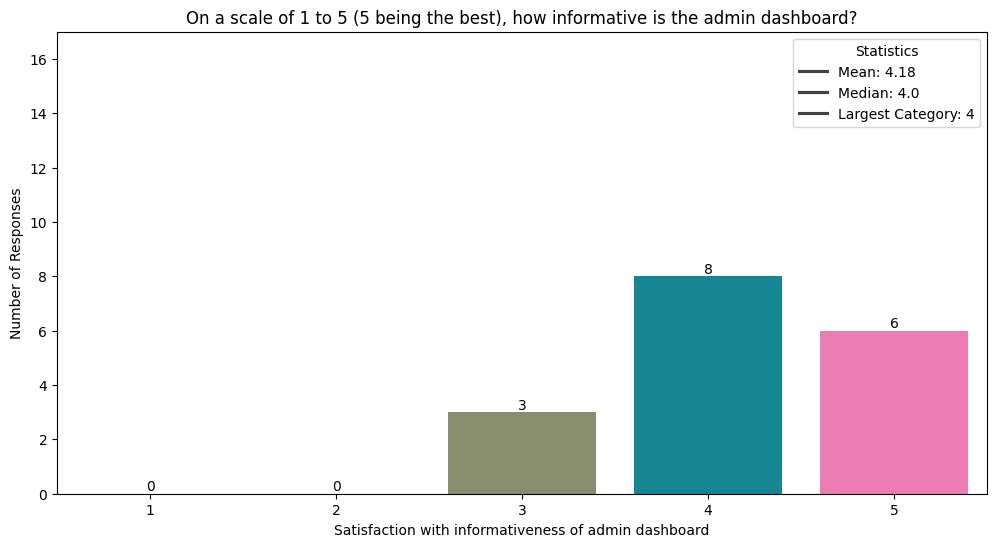

<Figure size 640x480 with 0 Axes>

In [61]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q17_x_bins, y=q17_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q17_x_bins, q17_y_bins)

# Median Value
median_value = calculate_median(q17_x_bins, q17_y_bins)


# Largest Category
largest_category = q17_y_bins.idxmax()

for i, v in enumerate(q17_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with informativeness of admin dashboard")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?")
plt.show()
plt.tight_layout()

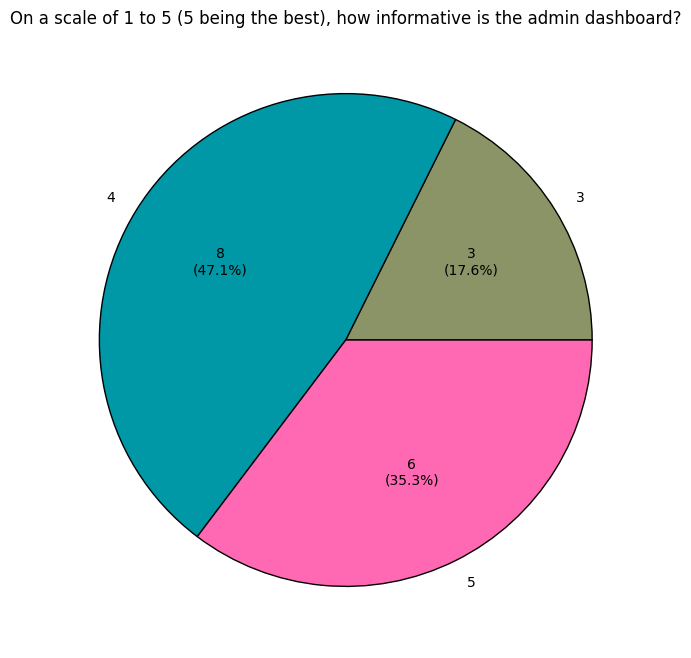

In [62]:
plt.figure(figsize=(10,8))

filtered_labels = [label if value > 0 else "" for label, value in zip(q17_x_bins, q17_y_bins)]

plt.pie(q17_y_bins, labels=filtered_labels, autopct=lambda pct: autopct_format(pct, q17_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?')
plt.show()


 Q18. What visual data would you want present in the admin dashboard?

In [63]:
q18_text_map = {
                "nope" : "no opinions",
                "support for multiple robots?" : "support for multiple robots",
                "whether it has been properly cleaned or not." : "degree of cleaning statistics",
                "believe was shown admin dashboard" : "no opinions",
                "last cleaned date" : "last cleaned date",
                "maybe time estimate ??": "cleaning time estimate",
                "perhaps mal": "malfunctioning rate",
                "live map from robot": "live map",
                "current status": "live map",
                "which parts room used cleaning most" : "cleaning heatmap",
                "really get to see in detail" : "no opinions",
                "graphs or charts" : "statistics",
                "more colour" : "colourful",
                "number keyboards cleaned" : "keyboard statistics",
                "n/a" : "no opinions",
                "ranking keyboards" : "keyboard statistics",
                "time left" : "cleaning time estimate",
}

def q18_map_text(text):
    keys = list(q18_text_map.keys())
    
    for key in keys:
        if key in text:
            return q18_text_map[key]
    
    return text

In [64]:
survey_df["q18_text"] = survey_df["What visual data would you want present in the admin dashboard?"].dropna().astype(str).apply(str.lower).apply(lambda x: remove_stopwords(x))
q18_text = list(survey_df["q18_text"].dropna())

print(q18_text)

cleaned_q18_text = []
for text in q18_text:
    cleaned_q18_text.append(q18_map_text(text.strip()))

print(cleaned_q18_text)

['nope', 'support for multiple robots?', 'essentially, whether it has been properly cleaned or not.', 'don’t believe was shown admin dashboard', 'last cleaned date', 'maybe time estimate ??', 'perhaps mal', 'live map from robot', 'current status robot (is it cleaning somewhere?)', 'some visualization about which parts room used cleaning most to help figure out best home location.', 'didn’t really get to see in detail.', 'maybe graphs or charts to see some statistics', 'bit more colour', 'circle graph for like number keyboards cleaned', 'n/a', 'ranking keyboards that haven’t been cleaned in longest time - maybe reminder if keyboards reach certain cap, i.e.: warning when its been 3 weeks since its been cleaned', 'time left']
['no opinions', 'support for multiple robots', 'degree of cleaning statistics', 'no opinions', 'last cleaned date', 'cleaning time estimate', 'malfunctioning rate', 'live map', 'live map', 'cleaning heatmap', 'no opinions', 'statistics', 'colourful', 'keyboard statis

no_opinions support_for_multiple_robots degree_of_cleaning_statistics no_opinions last_cleaned_date cleaning_time_estimate malfunctioning_rate live_map live_map cleaning_heatmap no_opinions statistics colourful keyboard_statistics no_opinions keyboard_statistics cleaning_time_estimate


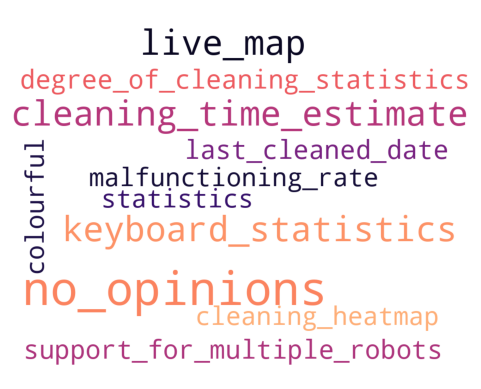

<Figure size 640x480 with 0 Axes>

In [65]:
processed_text = " ".join(token.replace(" ", "_") for token in cleaned_q18_text)
print(processed_text)

wordcloud_q18 = WordCloud(width=1000, 
                        height=800, 
                        background_color="white",
                        colormap="magma").generate(processed_text)
plt.imshow(wordcloud_q18)
plt.axis("off")
plt.show()
plt.tight_layout()

Q19. After observing the web app and robot integration, do you have any comments or suggestions for the product?

In [66]:
q19_text_map = {
                "nope" : "no opinions",
                "ui said keyboard was cleaned before robot finished cleaning" : "ui robot sync issues",
                "make sure to let user know how effective your cleaning is" : "information on cleaning effectiveness",
                "great job" : "great work",
                "no" : "no opinions",
                "robot seems too big" : "robot too big",
                "great work" : "great work",
                "improved path finding" : "improved path finding",
                "n/a" : "no opinions",
                "led" : "visual cue on robot status",
                "not let you schedule another clean/cancel scheduled clean in case you press button again accidentally." : "handling user errors",
                "useful in library" : "useful in library",
                "cleaning for spills" : "other types of cleaning",
                "status robot" : "information on robot status",
                "would be nice to see an eta when robot will arrive." : "robot arrival time estimate",
                "after it has cleaned" : "redirection after cleaning",
                "when you press green button when cleaning finished" : "handling user errors",
                "map keyboard locations" : "cleaning heatmap",
                "cleaned button are different" : "different button colours",
                "safety options on ui?" : "safety options on ui", 
}

def q19_map_text(text):
    keys = list(q19_text_map.keys())
    
    for key in keys:
        if key in text:
            return q19_text_map[key]
    
    return ""


In [67]:
survey_df["q19_text"] = survey_df["After observing the web app and robot integration, do you have any comments or suggestions for the product?"].dropna().astype(str).apply(str.lower).apply(lambda x: remove_stopwords(x))
q19_text = list(survey_df["q19_text"].dropna())

print(q19_text)

cleaned_q19_text = []
for text in q19_text:
    cleaned_text = text_split(text)
    for word in cleaned_text:
        cleaned_q19_text.append(q19_map_text(word.strip()))

print(cleaned_q19_text)

['nope', 'ui said keyboard was cleaned before robot finished cleaning, and while it was on its way to keyboard', 'make sure to let user know how effective your cleaning is. otherwise, great job. solve your problems with your arm great work!', 'no', 'robot seems too big to be able to navigate between desks, otherwise, great work', 'improved path finding', 'n/a', 'led on robot itself showing if it’s busy or available', 'think after it has cleaned, it should either redirect somewhere or not let you schedule another clean/cancel scheduled clean in case you press button again accidentally.', 'it seems quite useful in library setting, cleaning for spills and other stuff would be nice', 'would be good to know status robot (all saw was “waiting”) e.g.: ready to clean, cleaning another keyboard”, unavailable, etc. would be nice to see an eta when robot will arrive.', 'when you press green button when cleaning finished, wasn’t expecting it to call bot to clean again.', 'maybe map keyboard locati

no_opinions ui_robot_sync_issues   information_on_cleaning_effectiveness  great_work no_opinions robot_too_big   great_work improved_path_finding no_opinions visual_cue_on_robot_status  redirection_after_cleaning  no_opinions useful_in_library other_types_of_cleaning  no_opinions  no_opinions  robot_arrival_time_estimate handling_user_errors  cleaning_heatmap  no_opinions  different_button_colours no_opinions safety_options_on_ui


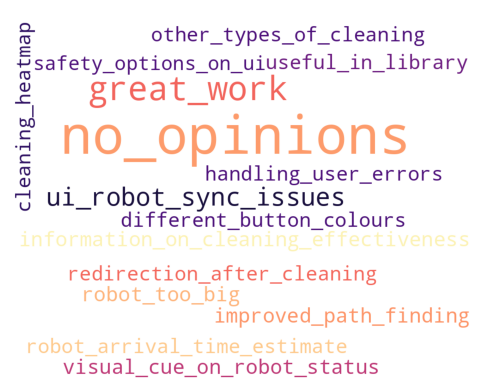

<Figure size 640x480 with 0 Axes>

In [68]:
processed_text = " ".join(token.replace(" ", "_") for token in cleaned_q19_text)
print(processed_text)

wordcloud_q19 = WordCloud(width=1000, 
                        height=800, 
                        background_color="white",
                        colormap="magma").generate(processed_text)
plt.imshow(wordcloud_q19)
plt.axis("off")
plt.show()
plt.tight_layout()